In [6]:
import numpy as np
import aocd
import re

In [68]:
test_input = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""

In [96]:
def parse_input(puzzle_input):
    lines = puzzle_input.split("\n")
    numbers = []
    for line in lines:
        parts = line.split(" ")
        rns = []
        for part in parts:
            part = part.split("=")[-1]
            rns += [int(x) for x in part.split(",")]
        numbers.append(rns)
    robots = np.array(numbers)
    positions, velocities = robots[:,:2], robots[:,2:]
    return positions, velocities

In [216]:
def predict_positions(puzzle_input, steps, h=7,w=11):
    positions, velocities = parse_input(puzzle_input)
    final_positions = (positions+(velocities*steps))%np.array([h,w])
    
    return final_positions

In [224]:
def make_map(positions, w=11, h = 7):
    m = np.zeros(shape = (h,w))
    l, c = np.unique(positions, return_counts=True, axis=0)
    for p, v in zip(l, c):
        m[p[1], p[0]] = v
    return m

In [225]:
def safety_factor(final_map):
    h,w = final_map.shape
    q1 = final_map[:h//2, :w//2]
    q2 = final_map[:h//2, w//2+1:]
    q3 = final_map[h//2+1:, :w//2]
    q4 = final_map[h//2+1:, w//2+1:]
    for q in (q1, q2, q3, q4):
        print(q.shape, q.sum())
    return q1.sum()*q2.sum()*q3.sum()*q4.sum()
    

In [226]:
safety_factor(final_map=fpm)

(3, 5) 1.0
(3, 5) 3.0
(3, 5) 4.0
(3, 5) 1.0


np.float64(12.0)

In [227]:
fpm

array([[0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [228]:
def solve1(puzzle_input, steps = 100, w = 11, h = 7):
    fps = predict_positions(puzzle_input, steps, w, h)
    fpm = make_map(fps, w, h)
    return(int(safety_factor(fpm)))

In [237]:
import matplotlib.pyplot as plt

In [229]:
solve1(test_input)

(3, 5) 1.0
(3, 5) 3.0
(3, 5) 4.0
(3, 5) 1.0


12

In [230]:
puzzle_input = aocd.get_data()

In [231]:
sf = solve1(puzzle_input, steps = 100, w = 101, h = 103)

(51, 50) 111.0
(51, 50) 131.0
(51, 50) 119.0
(51, 50) 132.0


In [232]:
sf

228410028

In [233]:
aocd.submit(sf)

answer a: None
submitting for part a


That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]


In [234]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import itertools

In [261]:

global world, positions, velocities
world = make_map(positions, 101,103)

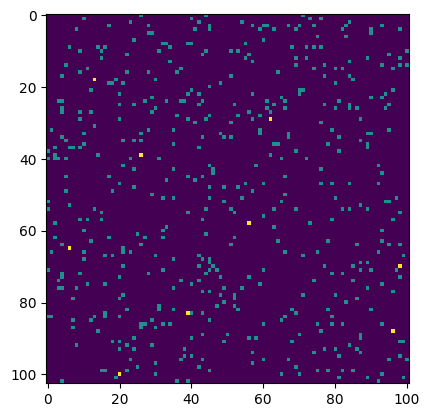

In [262]:
fig, ax  = plt.subplots()
img = ax.imshow(world)

In [270]:

def next_positions(positions, velocities, h,w):
    positions = (positions + velocities)%np.array([h,w])
    return positions

def next_world(positions, velocities, h, w):
    positions = next_positions(positions, velocities, h ,w )
    return make_map(positions, h, w), positions
    

In [264]:
w, h = world.shape

In [269]:

fig, ax = plt.subplots(figsize = (6,6))
img = ax.imshow(np.zeros(shape = (rows, cols)), cmap = "gray")
global world


#init function for the animation returns empty world
def init_func():
    img.set_array(np.zeros(shape = (rows, cols)))
    return img,


def animate(i):
    global world, positions, velocities
    w, h = world.shape
    world, positions = next_world(positions, velocities, h, w)
    img.set_array(world)
    img.autoscale()
    return img,
    
game = animation.FuncAnimation(fig, animate, init_func = init_func, blit = True, interval = 10, frames = 500);
plt.close(game._fig);
HTML(game.to_jshtml())

In [280]:
positions, velocities = parse_input(puzzle_input)
world, positions = next_world(positions, velocities, 101, 103)

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
img = ax.imshow(world > 0, cmap = "gray")
ax.set_title(f"i")
for i in range(15000):
    w, positions = next_world(positions, velocities, 101, 103)
    img.set_array(w>0)
    fig.savefig(f"{i}.jpg")
